**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

import seaborn as sns
import warnings

In [2]:
import plotly
warnings.filterwarnings("ignore")
sns.set_context('talk')
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [4]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
len(melb_df)

13580

In [6]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


#### 1.1

Analisis de las columnas mas importantes:

Columnas que elegimos para analizar

In [8]:
cols_numeric = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Car', 'Bathroom',	'Landsize',	'BuildingArea',	'YearBuilt',	'Propertycount', 'Lattitude', 'Longtitude'] 
cols_categoric = ['CouncilArea', 'Suburb', 'Type']

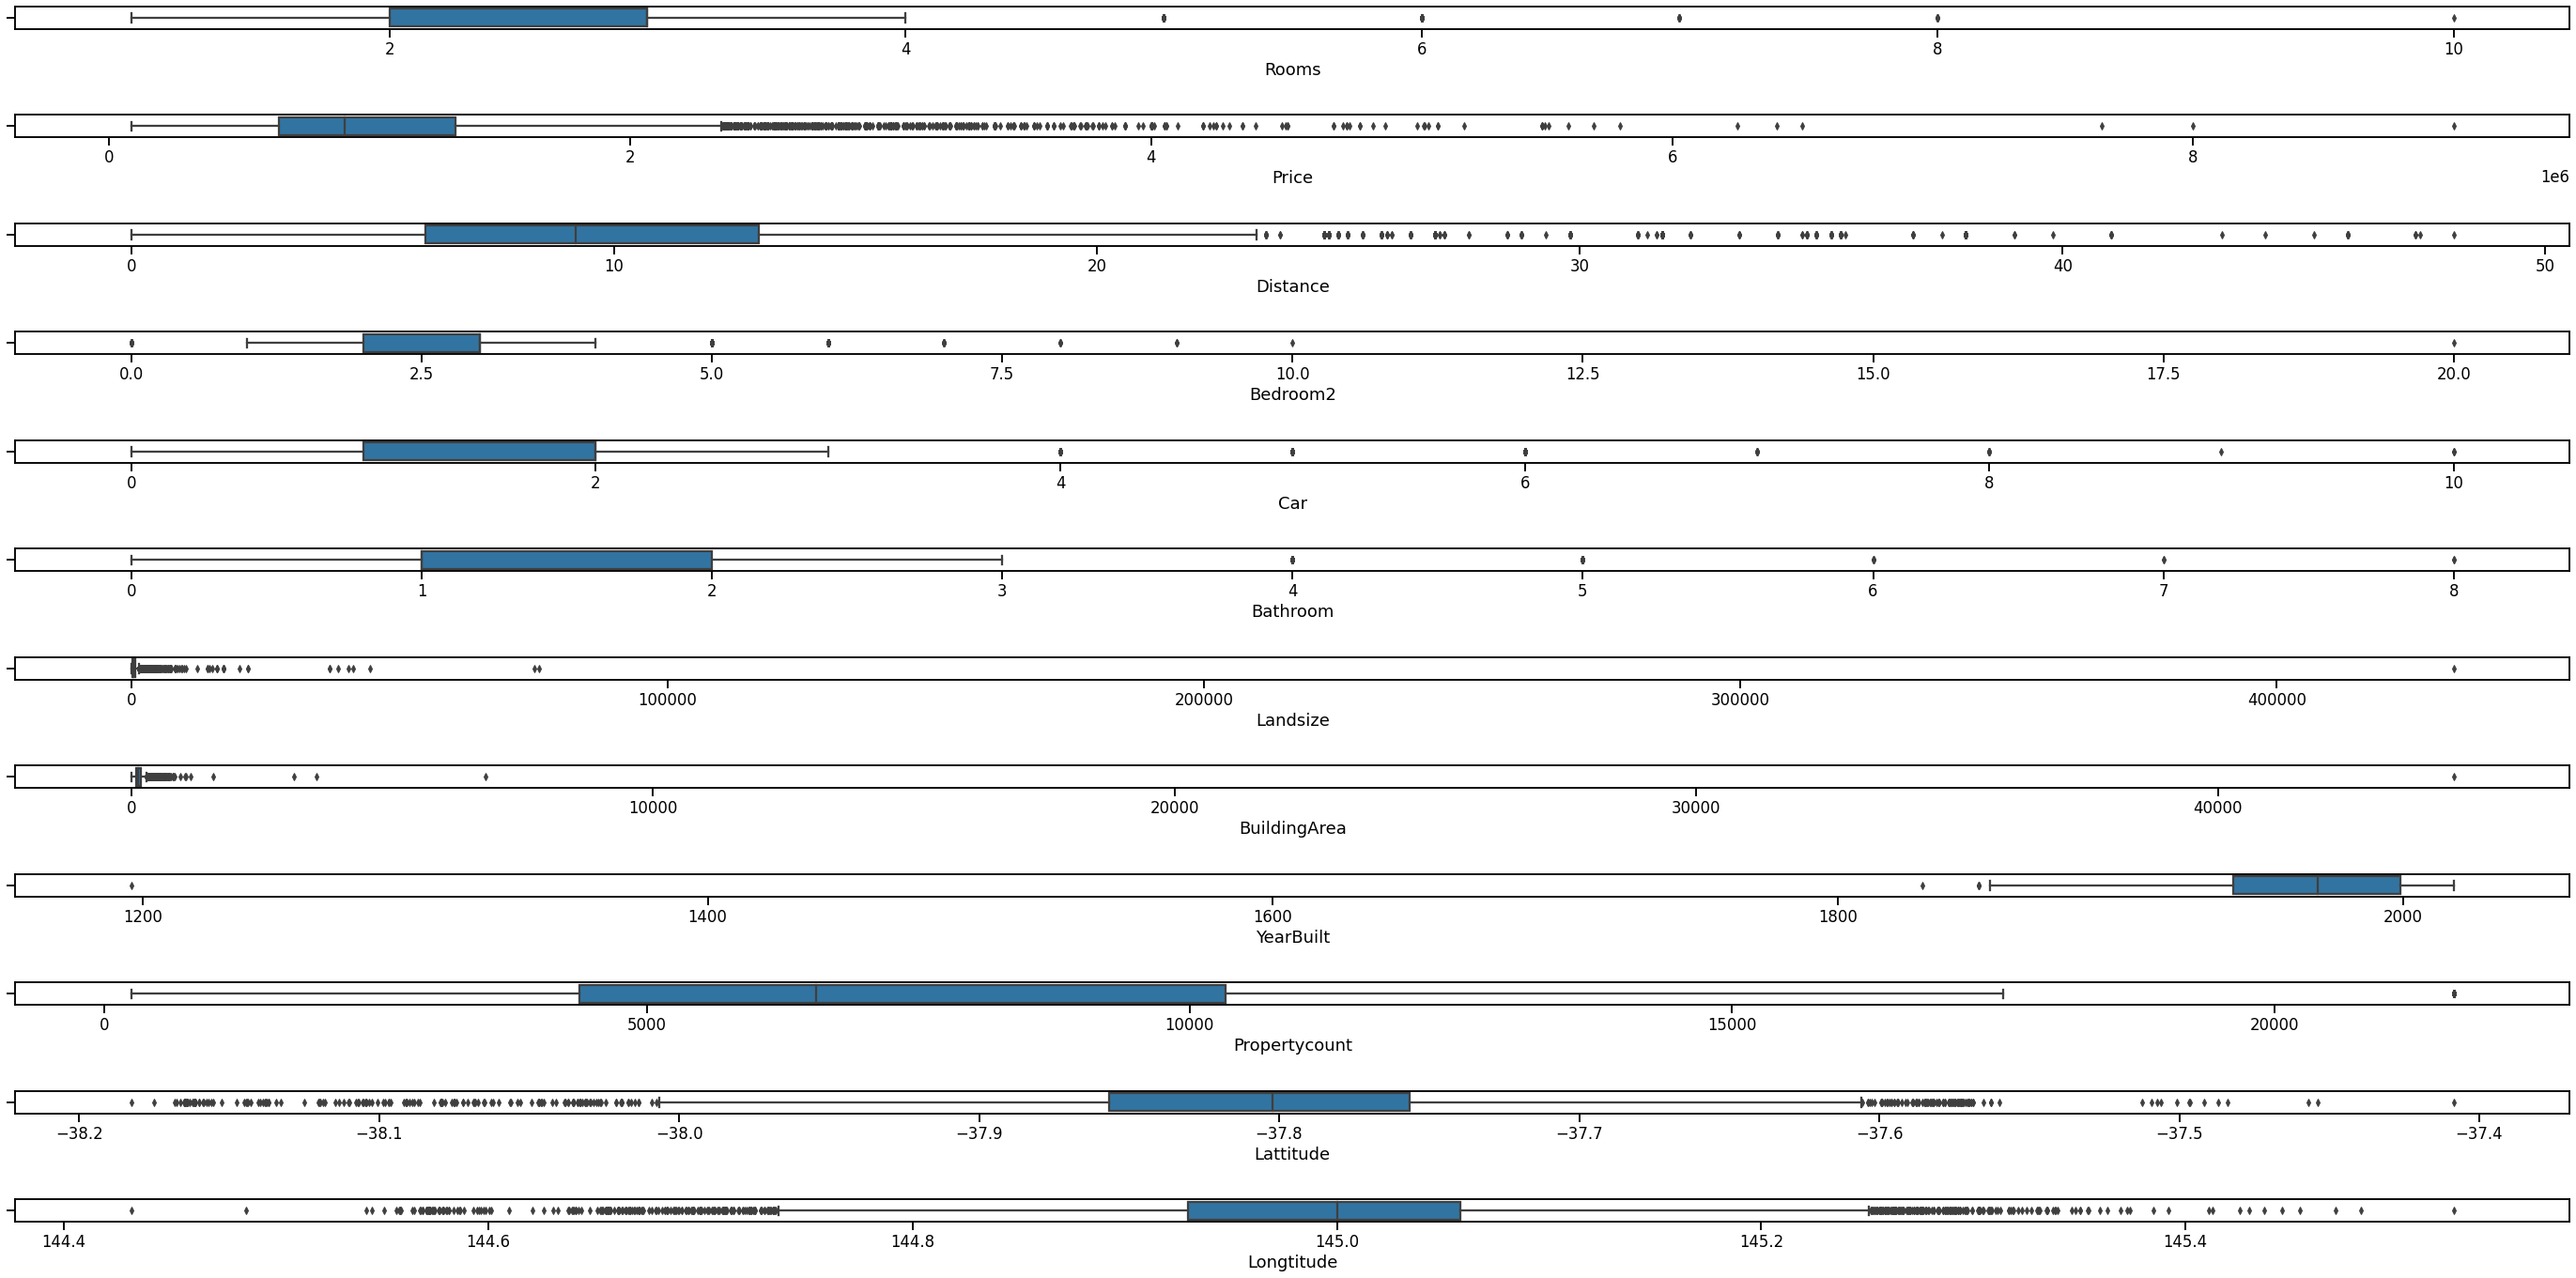

In [9]:
fig, ax = plt.subplots(len(cols_numeric), 1, figsize=(40,20), sharex=False)
fig.tight_layout(pad=3.0)

for i in range(len(cols_numeric)):
  sns.boxplot(melb_df[cols_numeric[i]], ax=ax[i])

Las columnas tales como "Address", "type", "Method", "SellerG", no fueron seleccionadas porque no aportan informacion de calidad vinculada al objetivo de la investigación. Se deben incorporar todas aquellas variables que nos brinden datos relevantes para nuestro problema, que se trata de para predecir el precio de venta de casas en Melbourne, Australia.



In [10]:
# Elimacion de unicamente los outliers - melb_df
def delete_outliers(df, cols):
  DF = df.copy()
  temp = []
  df_clean = df.copy()

  for c in cols:
    z_scores = zscore(df_clean[c])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    row_clean = df_clean[filtered_entries][c]
    temp.append([c, len(df_clean[c]), len(row_clean), len(df_clean[c]) - len(row_clean), df_clean[c].isna().sum() ])
    df_clean = df_clean[filtered_entries]
  temp = pd.DataFrame(temp, columns=["name", "count_values", "without_outliers", "count_outliers", "nan_count"])

  df_with_nan = df[cols][df[cols].isna().any(axis=1)]

  df_clean.merge(df_with_nan)

  return temp, df_clean

# columnas a analizar y eliminar outliers
temp, df = delete_outliers(melb_df, ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',	'Landsize',	'Propertycount'] )

Analisis de los valores totales, contra outliers y nan values

In [11]:
# np deberia de borrar todos los datos de car, buildingArea ni YearBuilt
temp

,name,count_values,without_outliers,count_outliers,nan_count
0,Rooms,13580,13494,86,0
1,Price,13494,13263,231,0
2,Distance,13263,13019,244,0
3,Bedroom2,13019,12996,23,0
4,Bathroom,12996,12925,71,0
5,Landsize,12925,12906,19,0
6,Propertycount,12906,12549,357,0


Dataframe sin outliers y con nan values para imputarlos

In [12]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


### 1.2.1

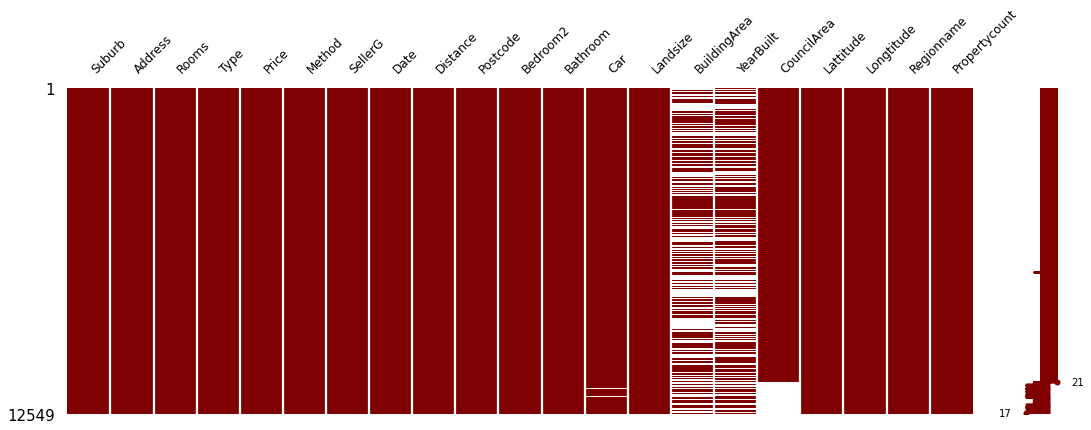

In [13]:
import missingno as msno
msno.matrix(df,figsize=(18, 6), fontsize=12, color=[0.5,0,0]) 

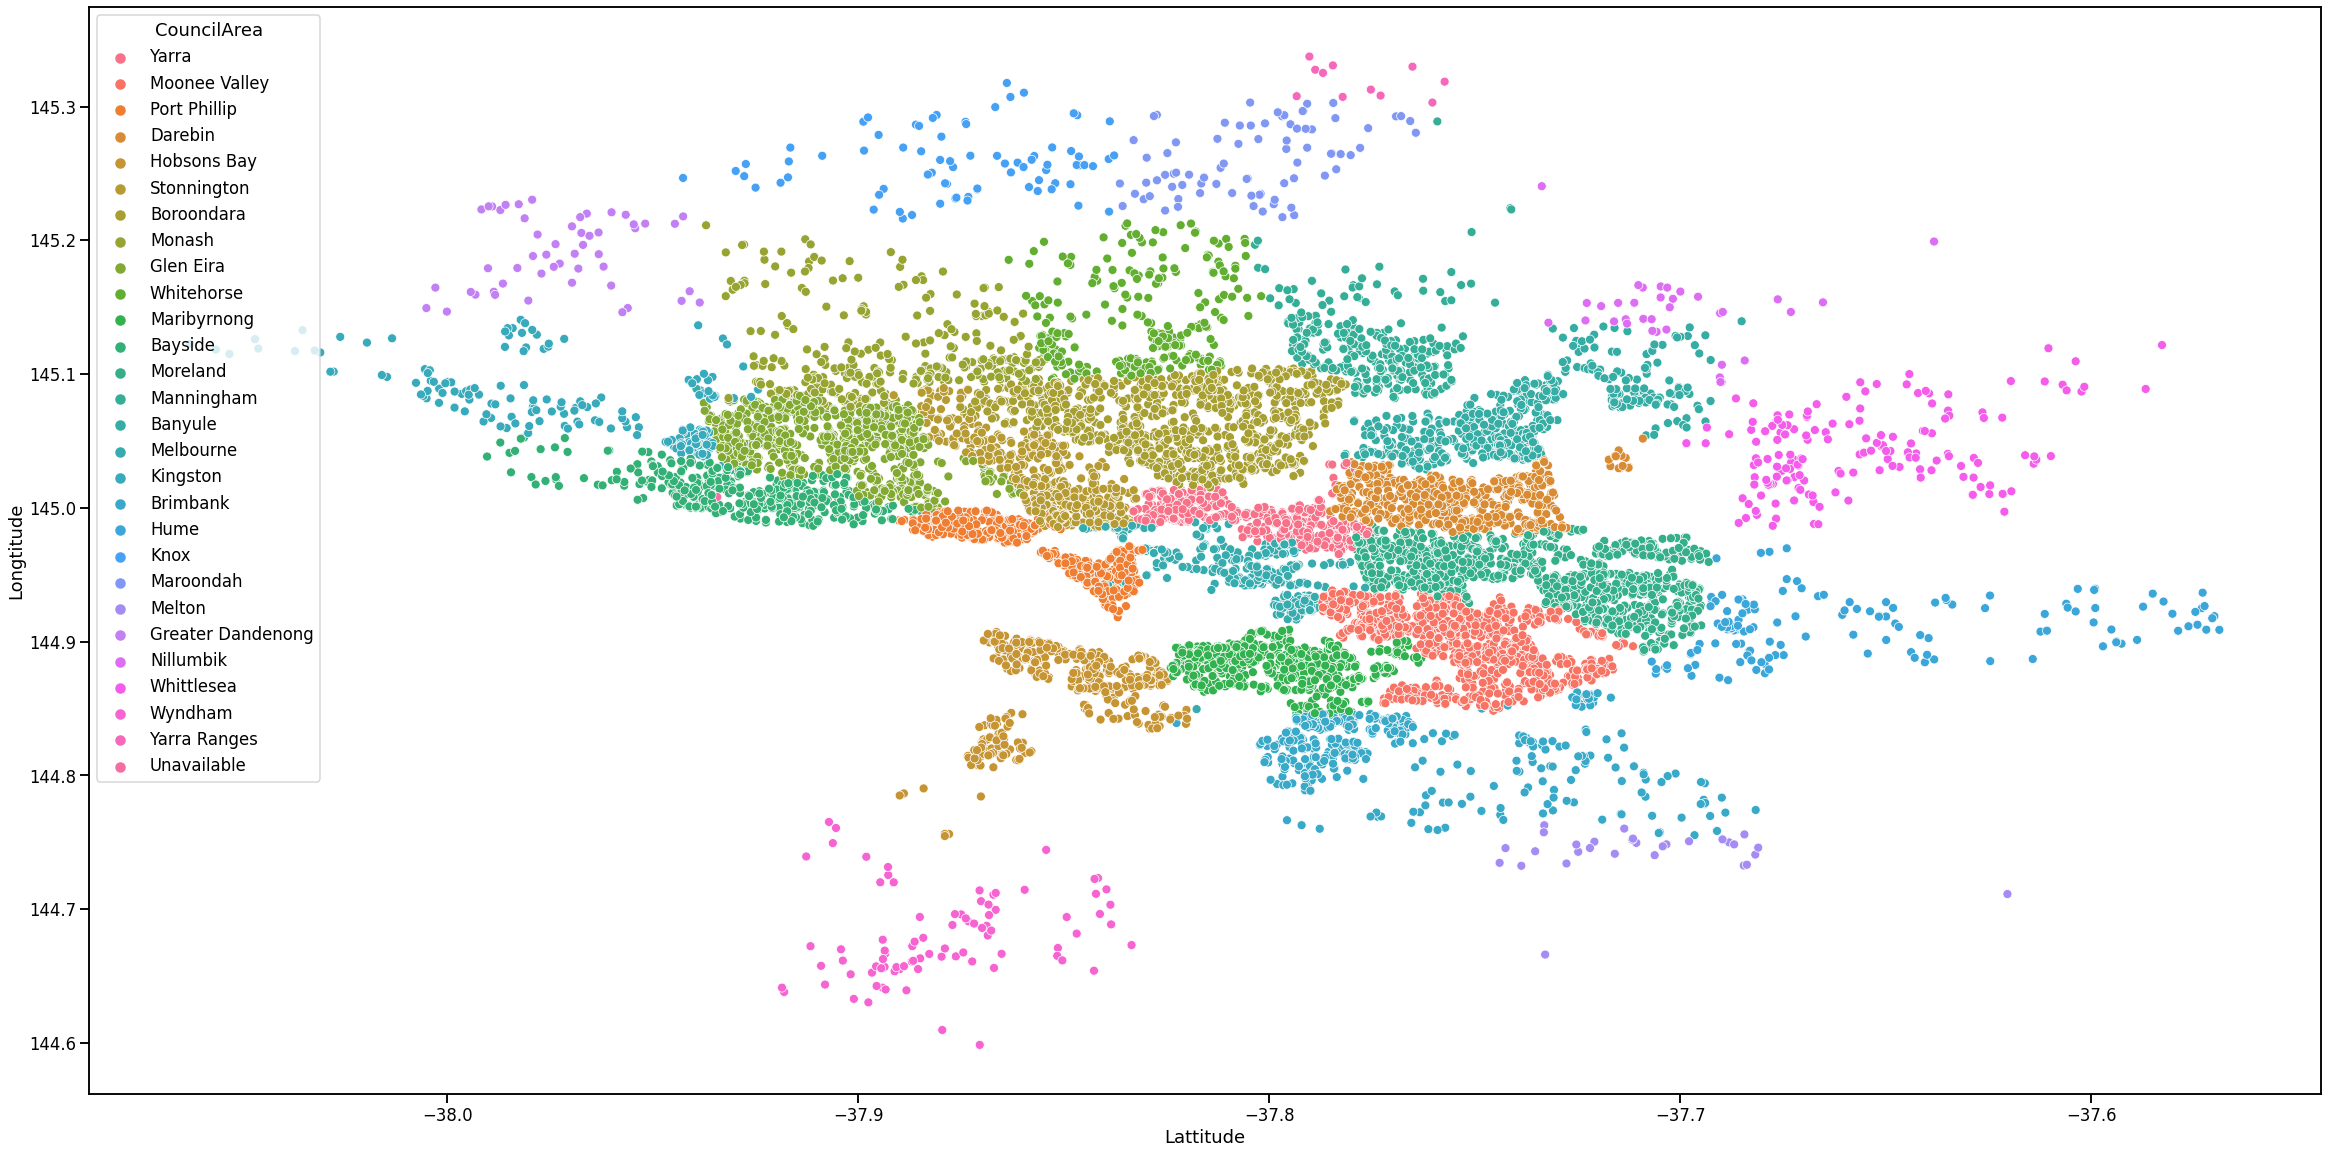

In [14]:
plt.figure(figsize=(40,20))
sns.scatterplot(x="Lattitude", y="Longtitude", hue="CouncilArea", data=df)

In [15]:
'''
MAPA SCATTER 3D PLOTLY

Para que en el grafico se puedan diferenciar los puntos por barri, la columna CouncilArea no tiene que tener nulos. Aca hice un dropna, pero se tendria que rellenar con el CouncilArea más cercano.
'''
import plotly.express as px

df_temp = df.dropna(subset=df.columns[[16]], how='any')

fig = px.scatter_3d(df_temp, x='Longtitude', y='Lattitude', z='Price', color='CouncilArea')
fig.update_layout(
    autosize=False,
    height=1000,
    width=1000
)
fig.show()

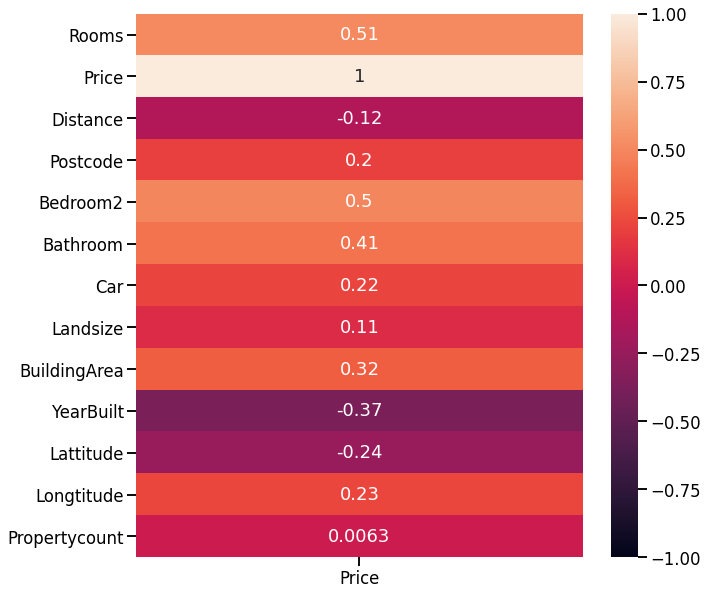

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Price']], vmax=1, vmin=-1, annot=True)

En base del grafico anterior podemos ver las variables con mayor cantidad de correlacion con respecto del precio

In [17]:
df["Price"].shape

(12549,)

In [18]:
df["Car"].dtypes

dtype('float64')

In [19]:
#agrupamos la variable Car   / #creamos nueva columna cars2 para agregar leyenda.
#df["Car"]=df["Car"].apply(lambda x:"mas de 3" if x > 3 else x) 
df["Car_grouped"]=df["Car"].apply(lambda x:"mas de 4" if x > 4 else x) 
df[df["Car"]>3].loc[0:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_grouped
51,Airport West,3 Deidre Ct,3,h,895000.0,PI,Rendina,10/09/2016,13.5,3042.0,3.0,1.0,6.0,1063.0,133.0,1975.0,Moonee Valley,-37.72490,144.87280,Western Metropolitan,3464.0,mas de 4
61,Airport West,138 Victory Rd,3,h,1042000.0,S,Nelson,16/07/2016,13.5,3042.0,3.0,2.0,5.0,612.0,174.0,1950.0,Moonee Valley,-37.71730,144.87960,Western Metropolitan,3464.0,mas de 4
63,Airport West,6 Kittyhawk St,4,h,773000.0,S,Brad,17/09/2016,13.5,3042.0,5.0,3.0,4.0,531.0,309.0,1980.0,Moonee Valley,-37.72630,144.86790,Western Metropolitan,3464.0,4
120,Alphington,6 Smith St,4,h,2000000.0,S,Brace,3/09/2016,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Darebin,-37.77070,145.03180,Northern Metropolitan,2211.0,4
145,Altona,20 Linnet St,4,h,780000.0,PI,Sweeney,4/06/2016,13.8,3018.0,4.0,1.0,4.0,655.0,NaN,NaN,Hobsons Bay,-37.86800,144.81540,Western Metropolitan,5301.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,Pascoe Vale,1 Ann St,4,h,1260000.0,S,Eview,26/08/2017,8.5,3044.0,4.0,2.0,4.0,578.0,171.0,1920.0,NaN,-37.73058,144.93530,Northern Metropolitan,7485.0,4
13531,Richmond,170 Coppin St,4,h,1800000.0,S,Biggin,26/08/2017,2.4,3121.0,4.0,1.0,4.0,418.0,NaN,NaN,NaN,-37.82368,145.00271,Northern Metropolitan,14949.0,4
13535,Rosanna,30 Phillips Cr,4,h,1426000.0,S,Nelson,26/08/2017,8.9,3084.0,4.0,2.0,4.0,621.0,NaN,1980.0,NaN,-37.73543,145.07004,Eastern Metropolitan,3540.0,4
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,4


In [20]:
#agrupamos la variable rooms   /#creamos nueva columna cars2 para agregar leyenda.
#df["Rooms"]=df["Rooms"].apply(lambda x:"mas de 4" if x > 4 else x) 
df["Rooms_grouped"]=df["Rooms"].apply(lambda x:"mas de 4" if x > 4 else x) 
df[df["Rooms"]==4].loc[0:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_grouped,Rooms_grouped
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,2,4
20,Abbotsford,3/72 Charles St,4,h,1330000.0,PI,Kay,18/03/2017,2.5,3067.0,4.0,2.0,2.0,780.0,135.0,1900.0,Yarra,-37.80730,144.99520,Northern Metropolitan,4019.0,2,4
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,24/09/2016,2.5,3067.0,4.0,3.0,1.0,0.0,NaN,NaN,Yarra,-37.79940,144.99650,Northern Metropolitan,4019.0,1,4
46,Airport West,36 Roberts Rd,4,h,785000.0,S,Considine,6/08/2016,13.5,3042.0,3.0,1.0,2.0,597.0,127.0,NaN,Moonee Valley,-37.72590,144.87920,Western Metropolitan,3464.0,2,4
63,Airport West,6 Kittyhawk St,4,h,773000.0,S,Brad,17/09/2016,13.5,3042.0,5.0,3.0,4.0,531.0,309.0,1980.0,Moonee Valley,-37.72630,144.86790,Western Metropolitan,3464.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,Wantirna South,15 Mara Cl,4,h,1330000.0,S,Barry,26/08/2017,14.7,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,NaN,-37.86887,145.22116,Eastern Metropolitan,7082.0,2,4
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0,1,4
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,2,4
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,mas de 4,4


In [21]:
#df[df["Rooms"]==5].sample(10)
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Car_grouped       object
Rooms_grouped     object
dtype: object

##1.3.1 Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

In [22]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_cols)

#En esta parte del practico las operaciones estan hechas en base al dataframe df.
melb_df=df.copy(deep=True)


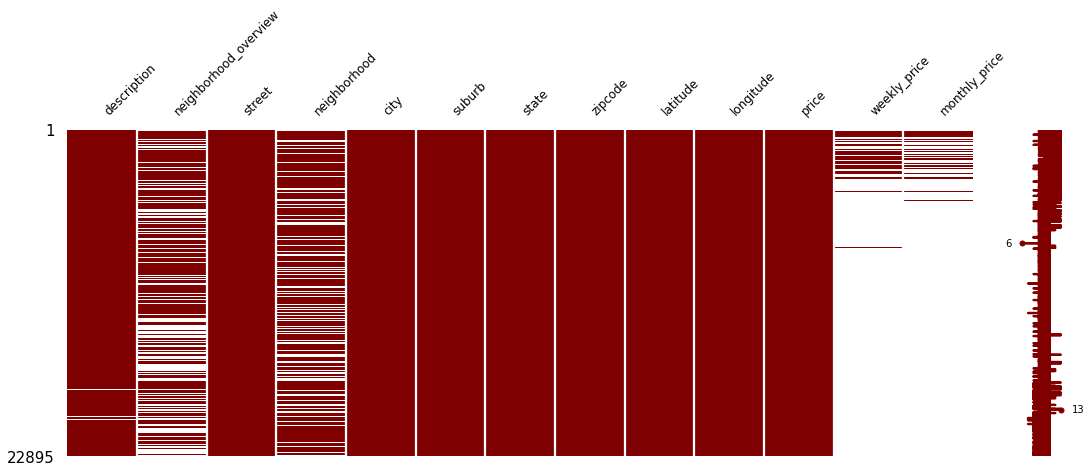

In [23]:
msno.matrix(airbnb_df,figsize=(18, 6), fontsize=12, color=[0.5,0,0]) 

In [24]:
len(airbnb_df)

22895

In [25]:
##Las variables a agregar son las MEDIDAS DESCRIPTIVAS de la columna PRICE: 
##     'count','mean','std','min','max','median','mad'
## Parece apropiado agregar todas estas medidas descriptivas, ya que los dataset se unirán en función de la columna ZIPCODE,
## 
## Los pasos que se realizan en este punto son:
## - realizar una curación de datos de los valores de ZIPCODE, ya que es la variable que se va a usar para unir los dataset
## - modificar el tipo de dato de la columna ZIPCODE, para que el dataset quede listo
## - calcular las medidas descriptivas de PRICE: 'count','mean','std','min','max','median','mad'

# PRICE: 
# Dado que los datos se unirán en función de la variable ZIPCODE, entonces evaluamos los valores de esta variable para detectar valores incorrectos...
airbnb_df['zipcode'].unique()

array(['3105', '3057', '3182', '3071', '3183', '3806', '3073', '3002',
       '3166', '3199', '3121', '3000', '3187', '3101', '3065', '3188',
       '3068', '3195', '3070', '3207', '3205', '3181', '3135', '3052',
       '3004', '3013', '3160', '3777', '3079', '3184', '3149', '3206',
       '3123', '3053', '3161', '3094', '3056', '3046', '3051', '3066',
       '3006', '3141', '3130', '3023', '3159', '3162', '3030', '3167',
       '3186', '3067', '3015', '3143', '3103', '3910', '3980', '3029',
       '3084', '3185', '3144', '3145', '3031', '3104', '3012', '3072',
       '3191', '3058', '3074', '3775', '3163', nan, '30122', '3147',
       '3789', '3175', '3099', '3018', '3011', '3078', '3788', '3107',
       '3042', '3040', '3178', '3134', '3089', '3142', '3911', '3168',
       '3008', '3129', '3146', '3190', '3088', '3193', '3131', '3204',
       '3032', '3109', '3797', '3782', '3003', 'VIC 3161', '3113', '3081',
       '3158', '3122', '3136', '3140', '3076', '3153', '3977', '3044',
    

In [26]:
# se detectan los siguientes valores de ZIPCODE mal registrados:
#   '30122' 'VIC 3161' '3000\n3000' '3084\n\n3084' 'VIC'
# Ver cantidad de filas con zipcode='30122'
airbnb_df.loc[airbnb_df['zipcode'].eq('30122')]
# Cant.de filas: 1 fila.

# Extraemos el nombre del suburbio de esa fila y contamos los códigos postales diferentes para ese suburbio
temp_suburb=airbnb_df.loc[airbnb_df['zipcode'].eq('30122')]['suburb']
print (temp_suburb)
#Hawthorn
airbnb_df.loc[airbnb_df['suburb'].eq('Hawthorn')]['zipcode'].value_counts()

# El código postal más frecuente para ese suburbio es 3122
# Reemplazamos el valor incorrecto '30122' por el valor más frecuente '3122'
airbnb_df.loc[airbnb_df['zipcode'].eq('30122'), 'zipcode'] = '3122'

# Controlamos que no exista más el valor incorrecto
airbnb_df.loc[airbnb_df['zipcode'].eq('30122')]

180    Hawthorn
Name: suburb, dtype: object


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price


In [27]:
# Ver cantidad de filas con zipcode='3000\n3000'
airbnb_df.loc[airbnb_df['zipcode'].eq('3000\n3000')]
# Cant.de filas: 1 fila.

# Extraemos el nombre del suburbio de esa fila y contamos los códigos postales diferentes para ese suburbio
temp_suburb=airbnb_df.loc[airbnb_df['zipcode'].eq('3000\n3000')]['suburb']
print (temp_suburb)
# Melbourne
airbnb_df.loc[airbnb_df['suburb'].eq('Melbourne')]['zipcode'].value_counts()

# El código postal más frecuente para ese suburbio es 3000
# Reemplazamos el valor incorrecto '3000\n3000' por el valor más frecuente '3000'
airbnb_df.loc[airbnb_df['zipcode'].eq('3000\n3000'), 'zipcode'] = '3000'

# Controlamos que no exista más el valor incorrecto
airbnb_df.loc[airbnb_df['zipcode'].eq('3000\n3000')]

4289    Melbourne
Name: suburb, dtype: object


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price


In [28]:
# Ver cantidad de filas con zipcode='VIC 3161'
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC 3161')]
# Cant.de filas: 1 fila.

# Extraemos el nombre del suburbio de esa fila y contamos los códigos postales diferentes para ese suburbio
temp_suburb=airbnb_df.loc[airbnb_df['zipcode'].eq('VIC 3161')]['suburb']
print (temp_suburb)
#St. Kilda
airbnb_df.loc[airbnb_df['suburb'].eq('St. Kilda')]['zipcode'].value_counts()

# El código postal más frecuente para ese suburbio es 3182
# Reemplazamos el valor incorrecto 'VIC 3161' por el valor más frecuente '3182'
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC 3161'), 'zipcode'] = '3182'

# Controlamos que no exista más el valor incorrecto
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC 3161')]

414    St. Kilda
Name: suburb, dtype: object


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price


In [29]:
# Ver cantidad de filas con zipcode='VIC'
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC')]
# Cant.de filas: 1 fila.

# Extraemos el nombre del suburbio de esa fila y contamos los códigos postales diferentes para ese suburbio
temp_suburb=airbnb_df.loc[airbnb_df['zipcode'].eq('VIC')]['suburb']
print (temp_suburb)

#South Yarra
airbnb_df.loc[airbnb_df['suburb'].eq('South Yarra')]['zipcode'].value_counts()

# El código postal más frecuente para ese suburbio es 5519
# Reemplazamos el valor incorrecto 'VIC 3161' por el valor más frecuente '3182'
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC'), 'zipcode'] = '3141'

# Controlamos que no exista más el valor incorrecto
airbnb_df.loc[airbnb_df['zipcode'].eq('VIC')]

6328    South Yarra
Name: suburb, dtype: object


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price


In [30]:
## Luego de corregir los valores de ZIPCODE, cambiamos el tipo de dato a numérico (ese es el tipo de datos que tiene el campo en el dataset de Melbourne)
print(airbnb_df[airbnb_df['zipcode'].isnull()]['zipcode'])
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df['zipcode'], errors='coerce')
airbnb_df = airbnb_df.dropna(subset=['zipcode'])
airbnb_df['zipcode'] = airbnb_df['zipcode'].astype('float64') 

171      NaN
205      NaN
342      NaN
353      NaN
418      NaN
        ... 
22023    NaN
22024    NaN
22044    NaN
22201    NaN
22287    NaN
Name: zipcode, Length: 142, dtype: object


In [31]:
## Finalmente, calculamos medidas descriptivas sobre PRICE
airbnb_df_zipcode_price=airbnb_df.groupby(['zipcode'])['price'] \
        .agg(['count','mean','std','min','max','median','mad']) \
        .reset_index('zipcode')
airbnb_df_zipcode_price.head(5)

,zipcode,count,mean,std,min,max,median,mad
0,2010.0,1,40.000000,NaN,40,40,40.0,0.000000
1,2134.0,1,50.000000,NaN,50,50,50.0,0.000000
2,2582.0,1,104.000000,NaN,104,104,104.0,0.000000
3,3000.0,3368,150.470012,189.51207,0,9000,129.0,62.589333
4,3001.0,2,132.500000,17.67767,120,145,132.5,12.500000


##1.3.2 Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [32]:
## Establecemos la cantidad mínima de filas en 25
minimal_rows_per_zip_code=25
## eliminamos las medidas descriptivas sobre PRICE de ZIPCODEs que tengan menos de 25 filas.
airbnb_df_zipcode_price.drop(airbnb_df_zipcode_price[airbnb_df_zipcode_price['count'] < minimal_rows_per_zip_code].index, inplace = True)
airbnb_df_zipcode_price

,zipcode,count,mean,std,min,max,median,mad
3,3000.0,3368,150.470012,189.512070,0,9000,129.0,62.589333
5,3002.0,197,200.979695,220.503204,19,1550,130.0,126.455771
6,3003.0,267,130.205993,77.007803,19,550,120.0,55.882703
7,3004.0,728,158.271978,131.771854,12,1771,130.0,72.722761
8,3006.0,1268,188.851735,196.919689,17,2998,150.0,100.890829
...,...,...,...,...,...,...,...,...
206,3788.0,89,249.370787,91.308715,86,610,270.0,64.204267
214,3799.0,89,196.932584,125.875642,35,750,180.0,89.810377
218,3805.0,34,225.235294,222.221028,30,1101,150.0,159.173010
219,3806.0,33,488.272727,2161.466693,37,12501,84.0,751.785124


In [33]:
## dataset de Melbourne
melb_df.info()
## dataset de ZipCode
airbnb_df_zipcode_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12549 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12549 non-null  object 
 1   Address        12549 non-null  object 
 2   Rooms          12549 non-null  int64  
 3   Type           12549 non-null  object 
 4   Price          12549 non-null  float64
 5   Method         12549 non-null  object 
 6   SellerG        12549 non-null  object 
 7   Date           12549 non-null  object 
 8   Distance       12549 non-null  float64
 9   Postcode       12549 non-null  float64
 10  Bedroom2       12549 non-null  float64
 11  Bathroom       12549 non-null  float64
 12  Car            12488 non-null  float64
 13  Landsize       12549 non-null  float64
 14  BuildingArea   6551 non-null   float64
 15  YearBuilt      7568 non-null   float64
 16  CouncilArea    11333 non-null  object 
 17  Lattitude      12549 non-null  float64
 18  Longti

In [34]:
# Unimos los connjuntos de datos, por el campo melb_df['Postcode'] y airbnb_df['zipcode']
df_merge_difkey = pd.merge(melb_df, airbnb_df_zipcode_price, left_on='Postcode', right_on='zipcode')
df_merge_difkey.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_grouped,Rooms_grouped,zipcode,count,mean,std,min,max,median,mad
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,1,2,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0,2,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0,3,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,1,3,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2,4,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965


##1.3.3 Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no.

Otras dos variables que pudieran servir para combinar serían las variables de latitud y longitud del dataset de airbinb. Entonces:



*   anotadores expertos definen una zona geográfica (ej.un barrio, o un suburbio,entre otros) en función de latitud y longitud: esa zona geográfica será la que se usará para combinar los dataset. La zona geográfica podría estar definida mediante un punto central y un radio de cobertura aproximado o un polígono.
*   luego, para cada fila del dataset de airbnb, determinamos a qué zona geográfica definida por los expertos corresponde. La siguiente es una rutina que se puede usar para esta tarea para el caso que la zona estuviera definida como un punto central y un radio de cobertura en kilómetros:

from geopy import distance
 
center_point = [{'lat': -7.7940023, 'lng': 110.3656535}]
test_point = [{'lat': -7.79457, 'lng': 110.36563}]
radius = 5 # in kilometer
 
center_point_tuple = tuple(center_point[0].values()) # (-7.7940023, 110.3656535)
test_point_tuple = tuple(test_point[0].values()) # (-7.79457, 110.36563)
 
dis = distance.distance(center_point_tuple, test_point_tuple).km
print("Distance: {}".format(dis)) # Distance: 0.0628380925748918
 
if dis <= radius:
    print("{} point is inside the {} km radius from {} coordinate".format(test_point_tuple, radius, center_point_tuple))
else:
    print("{} point is outside the {} km radius from {} coordinate".format(test_point_tuple, radius, center_point_tuple))
 
La información adicional a agregar al dataset de Melbourne podría ser categórica, por ejemplo basadas en los reviews: promedio de rating, por ej.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [35]:
temp = df_merge_difkey[["Suburb","CouncilArea"]].groupby(["Suburb","CouncilArea"])["CouncilArea"].count()
temp

Suburb              CouncilArea  
Abbotsford          Yarra             55
Aberfeldie          Moonee Valley     39
Airport West        Moonee Valley     59
Albert Park         Port Phillip      60
Albion              Brimbank          38
                                    ... 
Williamstown        Hobsons Bay       99
Williamstown North  Hobsons Bay       18
Windsor             Port Phillip      20
                    Stonnington       35
Yarraville          Maribyrnong      153
Name: CouncilArea, Length: 218, dtype: int64

In [36]:
#cambiamos nombre de df
#df= df_merge_difkey
df= df_merge_difkey.copy()

In [37]:
classes_area = len(df["CouncilArea"].unique())
print("Proporción de datos sin CouncilArea:",df["CouncilArea"].isna().sum()/df.shape[0])
print("Cantidad de datos sin CouncilArea:",df["CouncilArea"].isna().sum()/df.shape[0])
print("Cantidad de Areas:", classes_area)
print("Cantidad de Suburb:", len(df["Suburb"].unique()))

Proporción de datos sin CouncilArea: 0.08646408839779006
Cantidad de datos sin CouncilArea: 0.08646408839779006
Cantidad de Areas: 28
Cantidad de Suburb: 194


In [38]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='most_frequent')

df[["Suburb","CouncilArea"]] = mean_imputer.fit_transform(df[["Suburb","CouncilArea"]])

In [39]:
df[["Suburb","CouncilArea"]].isna().sum()
#(df==0).sum(axis=0)

Suburb         0
CouncilArea    0
dtype: int64

In [40]:
df["YearBuilt"].isna().sum()

4260

In [41]:
df["YearBuilt"] = df["YearBuilt"].fillna(df["YearBuilt"].median())

In [42]:
df["YearBuilt"].isna().sum()

0

In [43]:
print("Cantidad de valores nulos: ", df["Car"].isna().sum())

Cantidad de valores nulos:  57


In [44]:
df["Car"] = df["Car"].fillna(0)
df["Car"].isna().sum()

0

In [45]:
## comparando los datos del dataset AirBnB con nuestro conjunto de datos, no hay muchos que podamos Imputar a excepcion del barrio
## terminar...

airbnb_df.neighborhood

0         Balwyn North
1            Brunswick
2             St Kilda
3            Thornbury
4        St Kilda East
             ...      
22890          Carlton
22891              NaN
22892              NaN
22893        Southbank
22894          Carlton
Name: neighborhood, Length: 22752, dtype: object

In [46]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_grouped,Rooms_grouped,zipcode,count,mean,std,min,max,median,mad
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,1969.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,1,2,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965


## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [47]:
#df.to_csv("clean_data.csv")
df.to_csv("C:\Curacion\clean_data.csv")

from google.colab import files
df.to_csv('Curacion_Entregable2_parte1.csv') 
files.download('Curacion_Entregable2_parte1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>